In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ashokveda/ML_deployment_Flask_AWS_marriage_age_prediction/master/age_of_marriage_data.csv")

In [3]:
df.shape

(2567, 10)

In [4]:
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   height           2449 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            2425 non-null   object 
 5   mother_tongue    2403 non-null   object 
 6   profession       2237 non-null   object 
 7   location         2412 non-null   object 
 8   country          2551 non-null   object 
 9   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 200.7+ KB


In [6]:
df.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


In [7]:
df.isna().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

## Data Cleaning

<b> Since there are some null values present in the dataset it is essential to deal with first before EDA </b>

In [8]:
#Let's find total percenatge of missing values first
(df.shape[0] - df.dropna().shape[0]) / df.shape[0]

0.24737047136735488

In [9]:
# Well after exploring dataset in detail, I realized filling null values is a very inappropriate task wrt to this dataset
# I prefferd to drop all missing records for mainitng high accuracy for the model

df.dropna(inplace=True)

In [10]:
df.shape

(1932, 10)

In [11]:
# Since height is a object type here, we need it convert it to cms for futher analysis
def height_convert_cms(h):
    return int(h.split('\'')[0])*30.48+\
    int(h.split('\'')[1].replace('"',''))*2.54

In [12]:
df['height_cms'] = df.height.apply(height_convert_cms)
df.drop('height',inplace=True,axis=1)

### EDA

(array([ 19.,  67., 163., 252., 311., 634., 207., 146.,  75.,  58.]),
 array([24. , 25.2, 26.4, 27.6, 28.8, 30. , 31.2, 32.4, 33.6, 34.8, 36. ]),
 <a list of 10 Patch objects>)

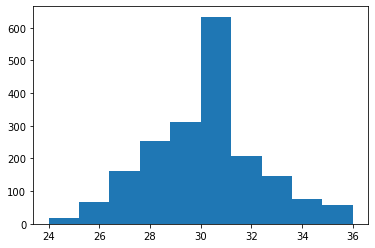

In [13]:
# Distributin of marriage age

plt.hist(df['age_of_marriage'])

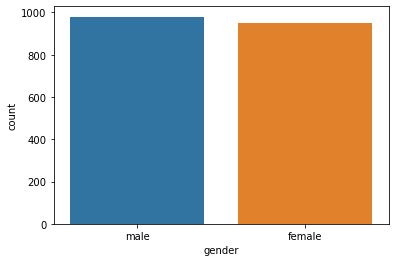

In [14]:
sns.countplot(df['gender'])

Text(0.5, 1.0, 'Age of Marriage vs. Gender')

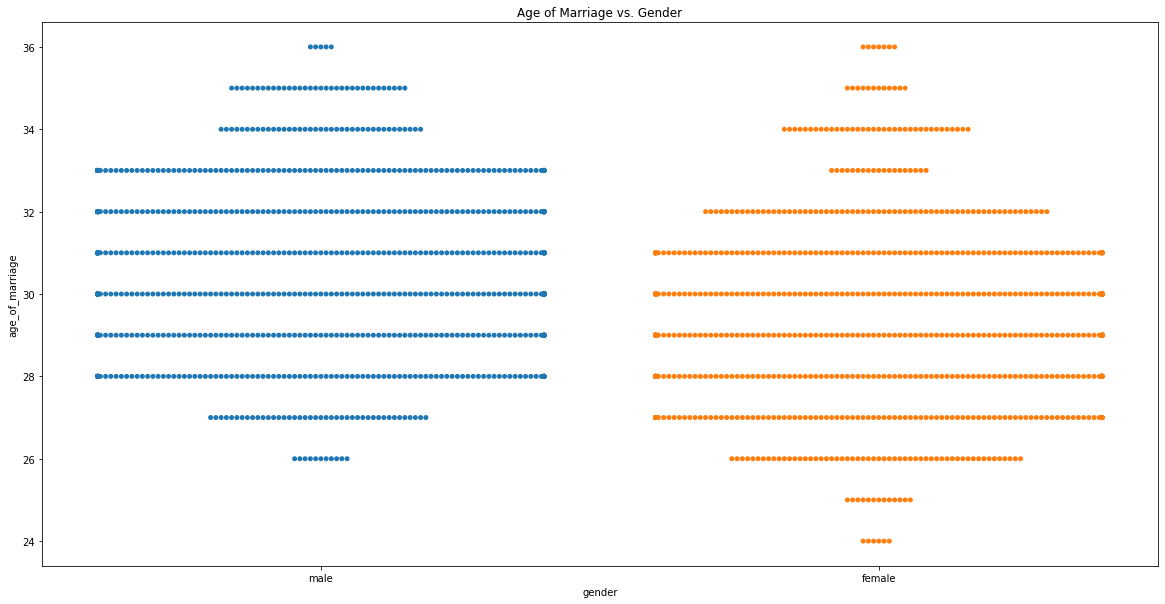

In [15]:
plt.figure(figsize=(20,10))
sns.swarmplot('gender', 'age_of_marriage', data=df)
plt.title('Age of Marriage vs. Gender')

In [16]:
df['religion'].value_counts()

Hindu        1576
Sikh          150
Christian     120
Jain           46
Muslim         40
Name: religion, dtype: int64

Text(0.5, 1.0, 'Age of Marriage based on Religion')

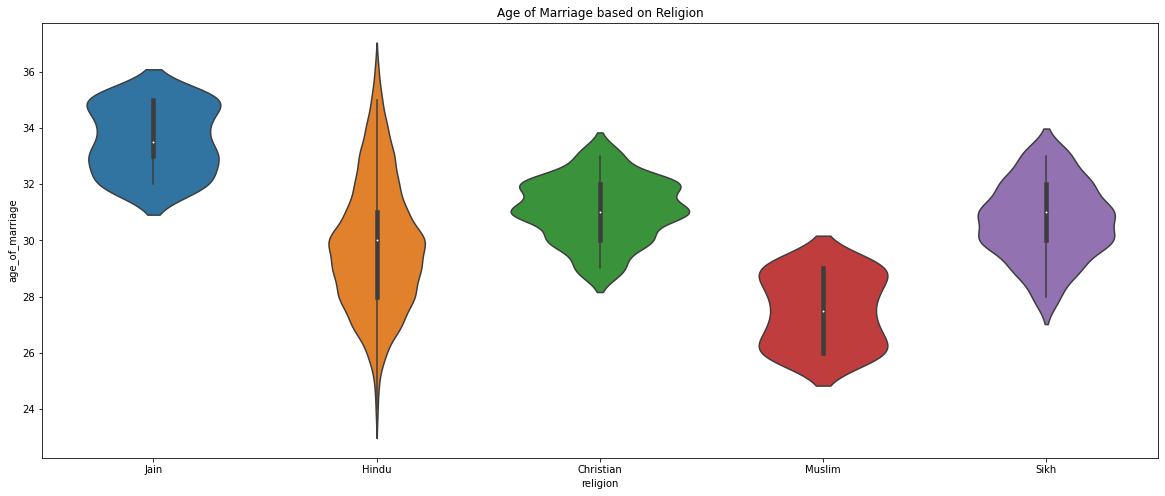

In [17]:
# Let's check the distribution of marriage age based on different religion, 
# as we know in different religions certain age of marriage is very important 

plt.figure(figsize=(20,8))
sns.violinplot('religion', 'age_of_marriage', data=df)
plt.title('Age of Marriage based on Religion')

Text(0.5, 1.0, 'Age of Marriage vs. Religion vs. Gender')

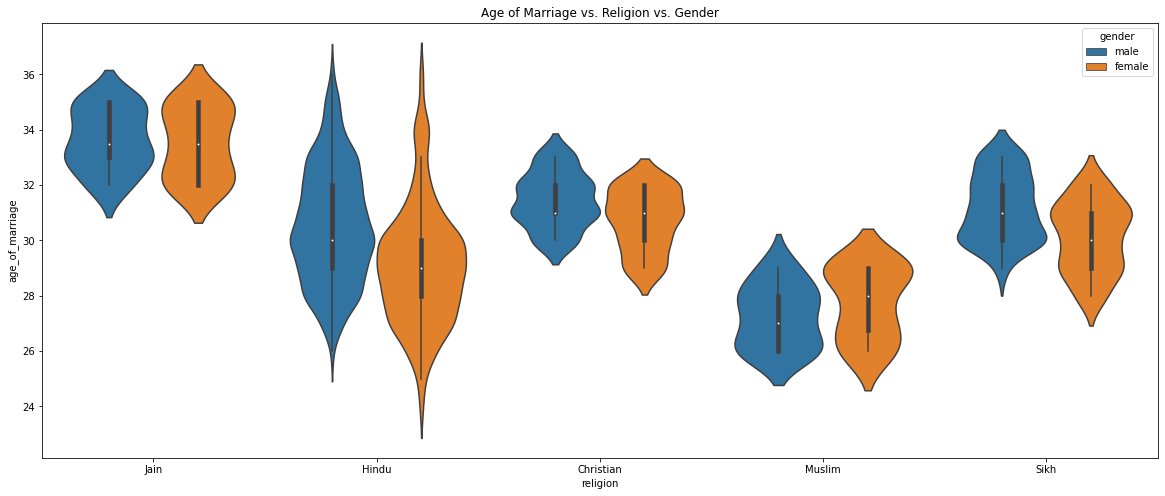

In [18]:
# Let's check it further by diving it on gender basis
# In general female's age would be slightly less than the male's age, we could confirm that from following

plt.figure(figsize=(20,8))
sns.violinplot('religion', 'age_of_marriage', hue='gender', data=df)
plt.title('Age of Marriage vs. Religion vs. Gender')

### Feature Engineering

In [19]:
# Let's check age of marriage based on working status
# for that first we will create a new column as working - 'yes' or 'no'
# then we will plot it against age

In [20]:
df['working'] = df['profession'].apply(lambda x: 'No' if x=='Not Specified' or x=='Not working' else 'Yes' )

In [21]:
df['working'].value_counts()

Yes    1499
No      433
Name: working, dtype: int64

Text(0.5, 1.0, 'Marriage Age vs. Working Status')

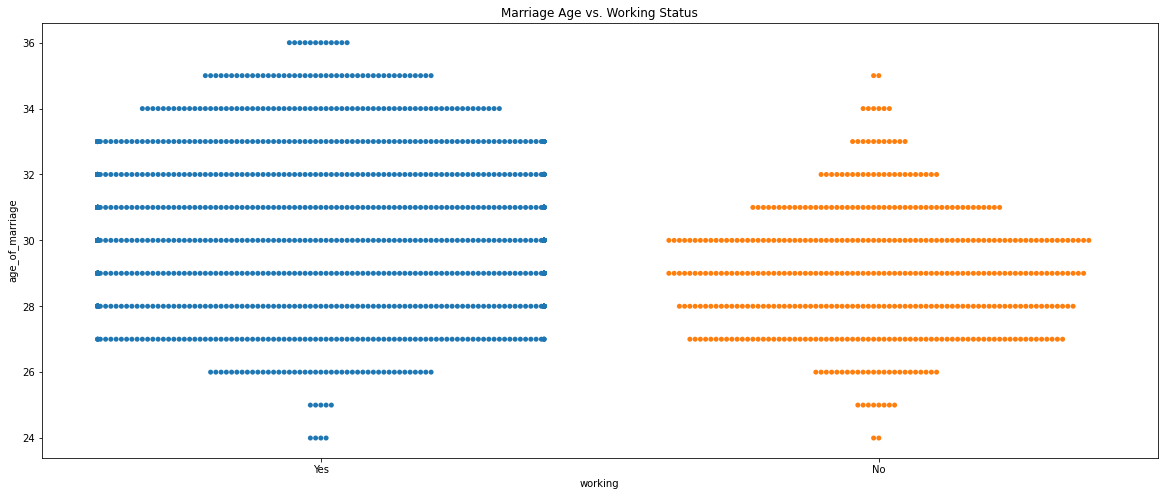

In [22]:
plt.figure(figsize=(20,8))
sns.swarmplot('working', 'age_of_marriage', data=df )
plt.title('Marriage Age vs. Working Status')

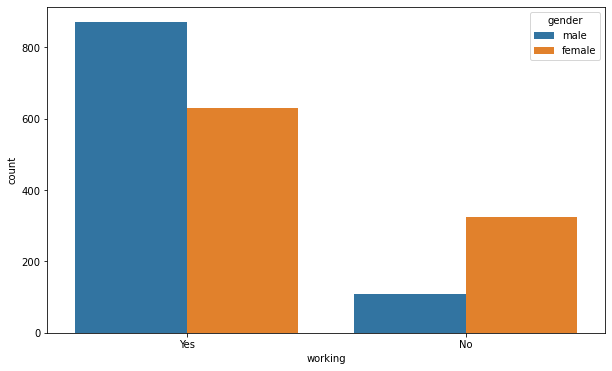

In [23]:
# Also check working status based on gender
plt.figure(figsize=(10,6))
sns.countplot('working', hue='gender', data=df)

### Splitting that dataset

In [24]:
X = df.loc[:,['gender','height_cms','religion','caste','mother_tongue','country','working']]
y = df.age_of_marriage

### Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['gender','religion','caste','mother_tongue','country','working']]= \
X.loc[:,['gender','religion','caste','mother_tongue','country','working']].apply(enc.fit_transform)

In [26]:
X.head()

,gender,height_cms,religion,caste,mother_tongue,country,working
1,1,170.18,2,34,6,19,1
2,1,170.18,1,14,8,5,1
3,0,152.40,1,36,8,5,1
4,1,165.10,0,13,13,5,1
5,1,165.10,1,38,8,5,1


### Model building

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=80,max_depth=11)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score
print(r2_score(y_test,y_predict))

0.7019290645159313
